
*   This Notebook contains the code used to generate the visualization of some particular compression configurations
*   Connect the Notebook to a GPU (e.g. T4 or A100) in order to run the code

# Environment settings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/MA2/Master Thesis/project')

Mounted at /content/drive


In [ ]:
!pip install transformers
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

import torch
from nn_tools.nn_compression import (Model, knapsack_greedy_compression, plot_rank_ratio_heatmap)
from nn_tools import algebraic as alg
from nn_tools import fine_tuning as ft

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#The number of classes corresponding to each classification dataset from the GLUE benchmark
classification_dict = {
    "cola" : 2,
    "sst2" : 2,
    "mrpc" : 2,
    "qqp" : 2,
    "mnli" : 3,
    "qnli" : 2,
    "rte" : 2,
    "wnli" : 2,
}

# Visualization

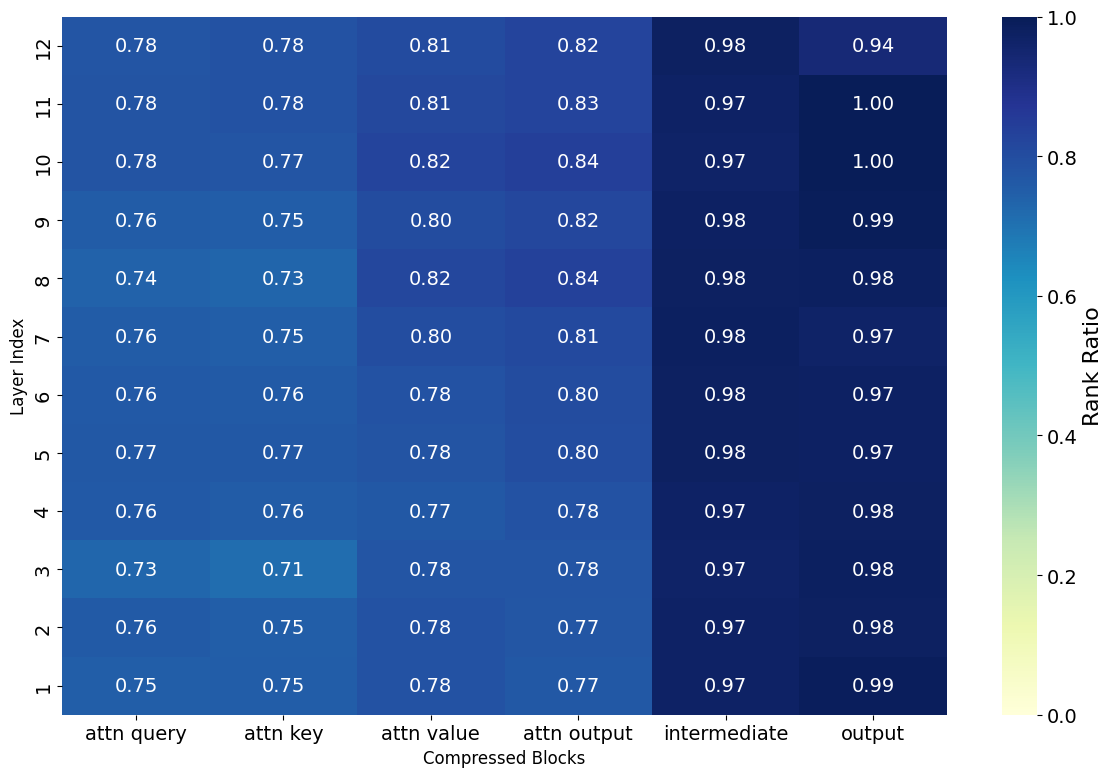

max rank : 726.583984375


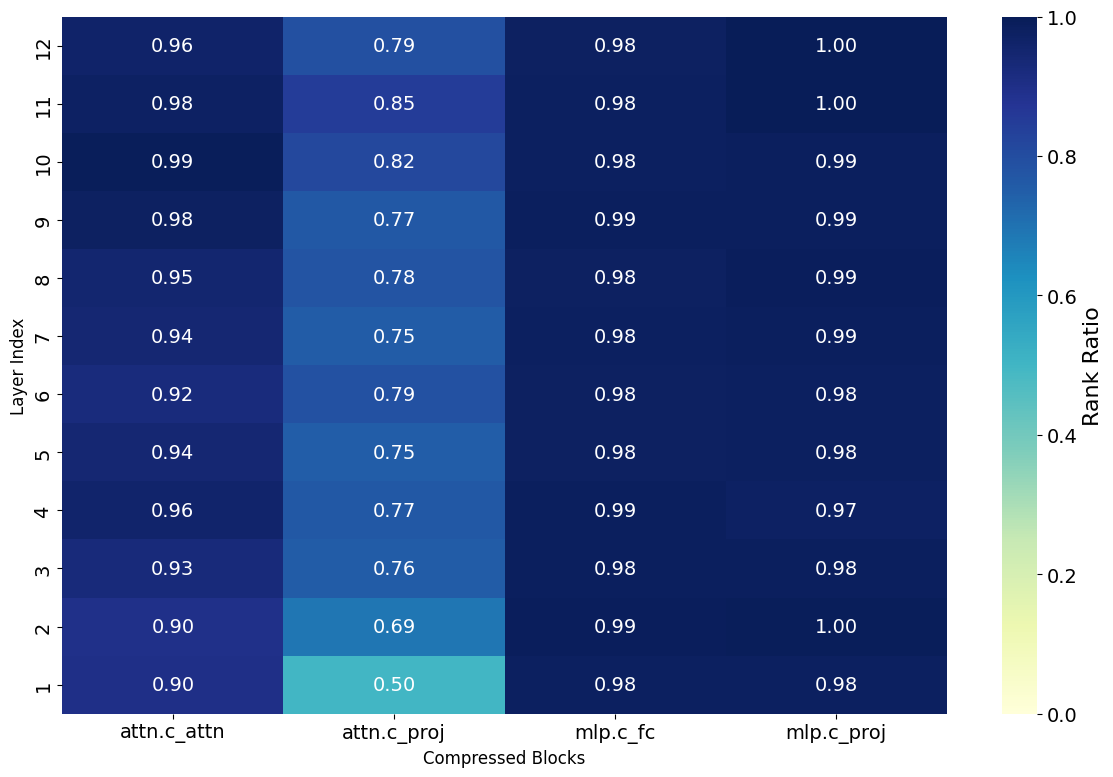

max rank : 713.1134643554688


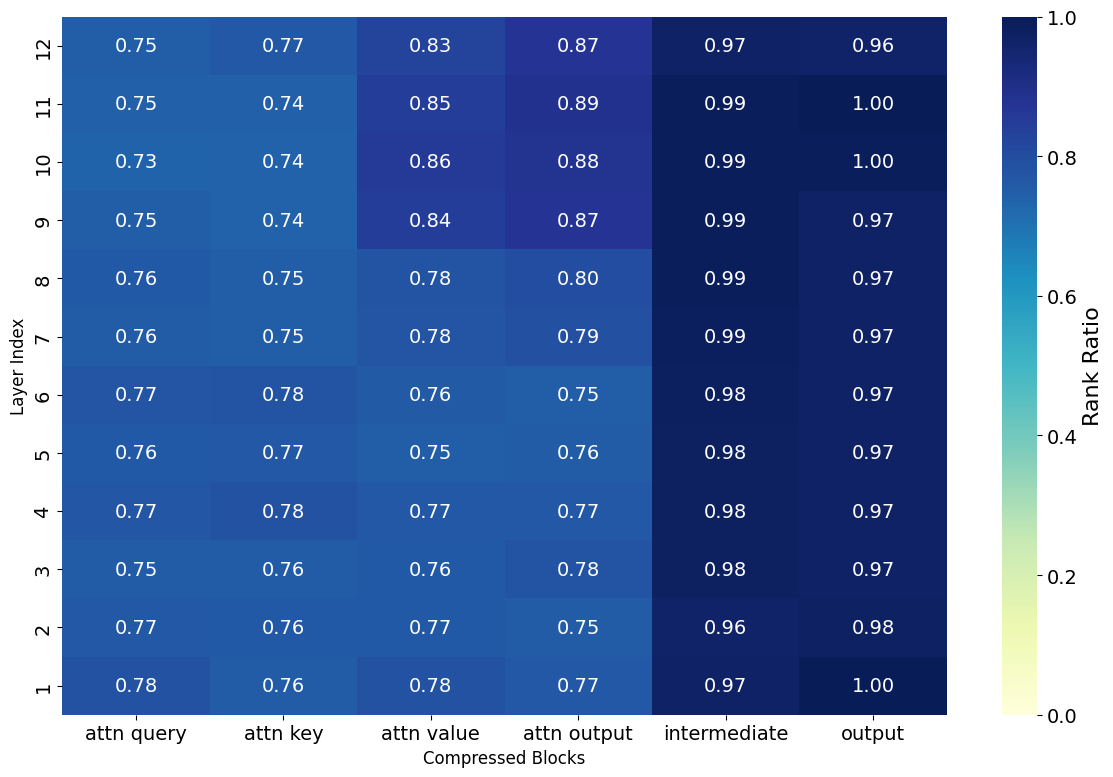

max rank : 708.5647583007812


In [ ]:
#Classification Model
name_ = ['bert', 'gpt2', 'roberta']
task = 'classification'
dataset_name_ = ["cola"]

for name in name_ :
  for dataset_name in dataset_name_ :
    weight_path = f'/content/drive/MyDrive/MA2/Master Thesis/project/models/{name}/{name}_{dataset_name}.pth'
    n_class = classification_dict[dataset_name]

    #-> load pretrained model with specified weight path
    my_Model = Model(name, task, weight_path)

    rank_dict = {}
    for block_name in my_Model.compression_blocks :
      rank_dict[block_name] = np.ones(my_Model.n_layers)

    max_rank = 1

    for layer_name in my_Model.compression_layers :
      block_type, layer_idx = my_Model.parse_layer_name(layer_name)
      W = my_Model.weight_matrix(layer_name).detach().cpu().numpy()
      r = alg.rank_metric(W, metric='effective_rank')
      rank_dict[block_type][layer_idx] = r
      if r > max_rank :
        max_rank = r

    for block_name in my_Model.compression_blocks :
      rank_dict[block_name] = rank_dict[block_name]/max_rank

    plot_rank_ratio_heatmap(rank_dict, '')
    print(f'max rank : {max_rank}')

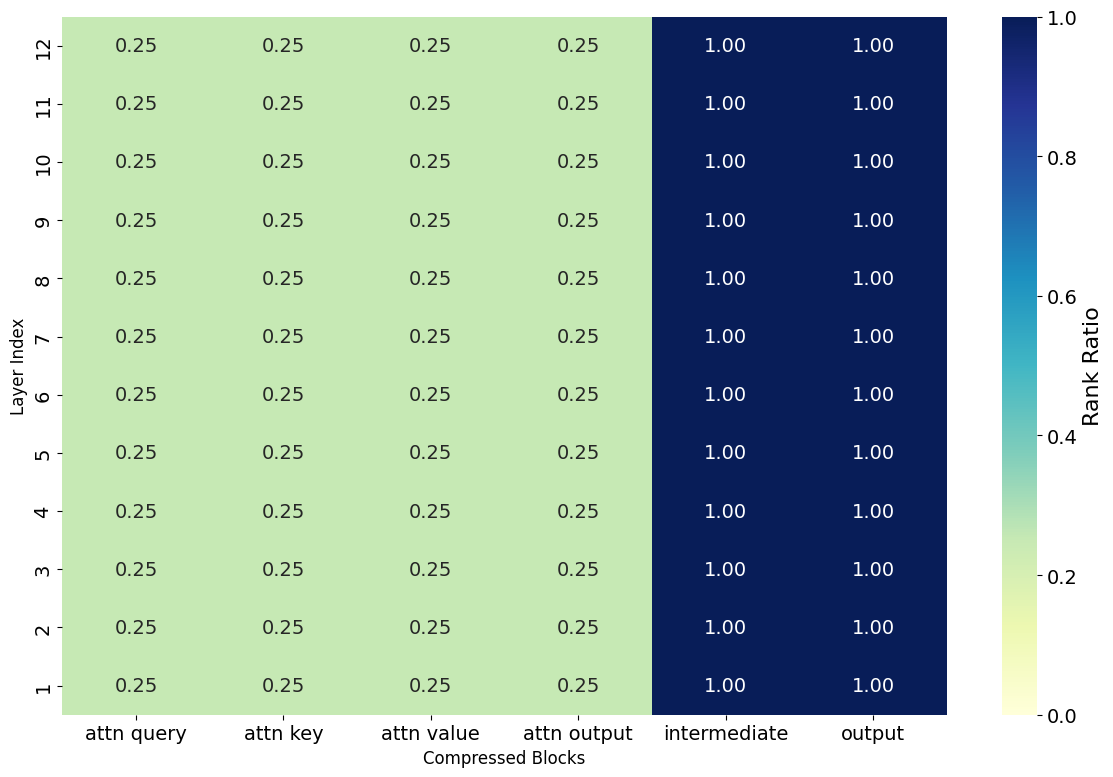

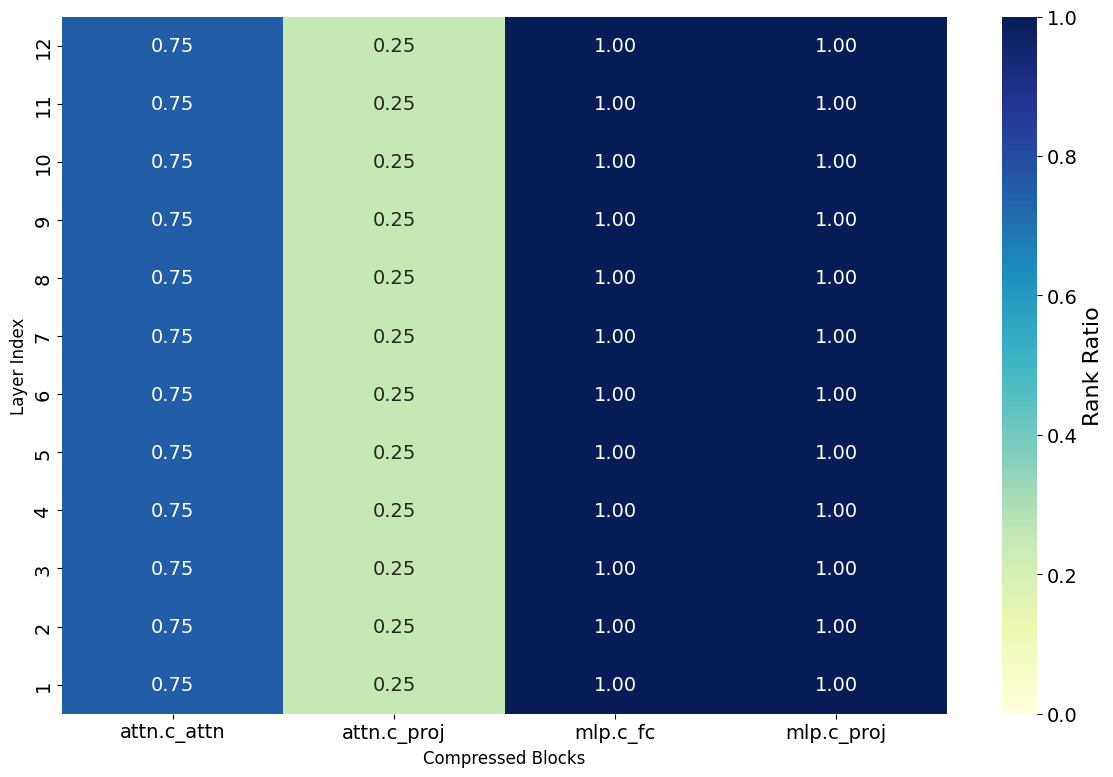

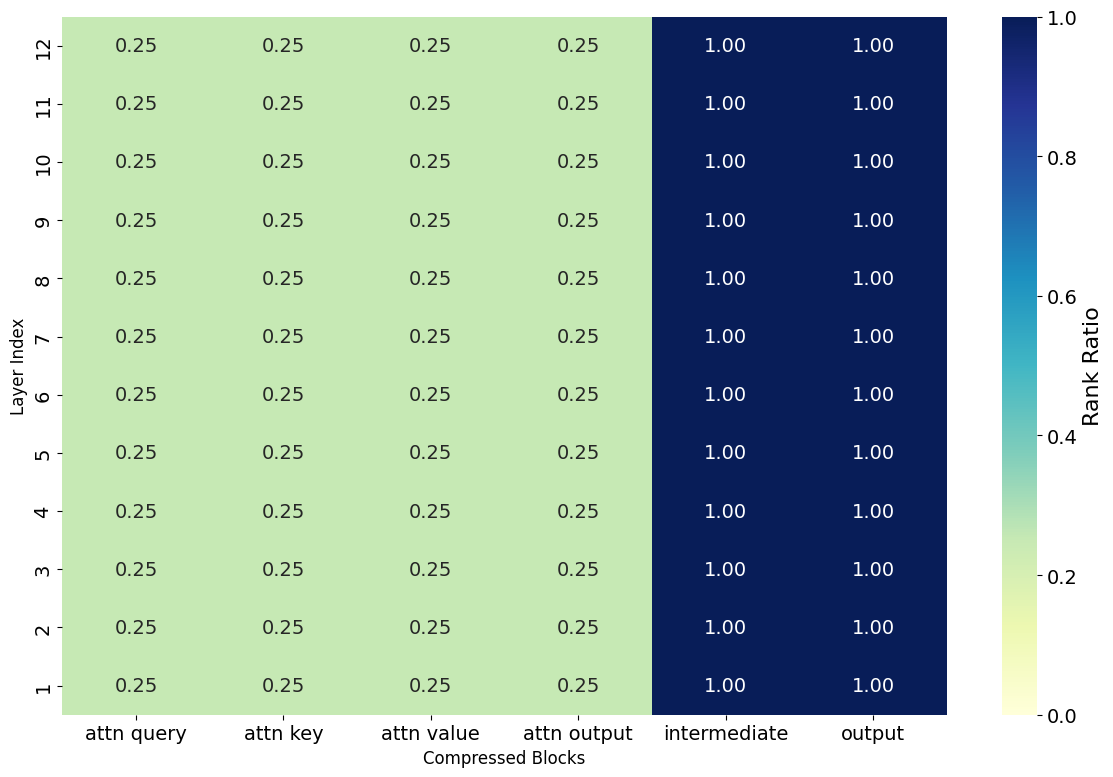

In [ ]:
#Classification Model
name_ = ['bert', 'gpt2', 'roberta']
task = 'classification'
dataset_name_ = ["cola"]

for name in name_ :
  for dataset_name in dataset_name_ :
    weight_path = f'/content/drive/MyDrive/MA2/Master Thesis/project/models/{name}/{name}_{dataset_name}.pth'
    n_class = classification_dict[dataset_name]

    #-> load pretrained model with specified weight path
    my_Model = Model(name, task, weight_path)

    rank_dict = {}
    for block_name in my_Model.compression_blocks :
      rank_dict[block_name] = np.ones(my_Model.n_layers)

    max_param = 0

    for layer_name in my_Model.compression_layers :
      block_type, layer_idx = my_Model.parse_layer_name(layer_name)
      W = my_Model.weight_matrix(layer_name).detach().cpu().numpy()
      n_param = max(W.shape[0], W.shape[1])
      rank_dict[block_type][layer_idx] = n_param
      if n_param > max_param :
        max_param = n_param

    for block_name in my_Model.compression_blocks :
      rank_dict[block_name] = rank_dict[block_name]/max_param

    plot_rank_ratio_heatmap(rank_dict, '')

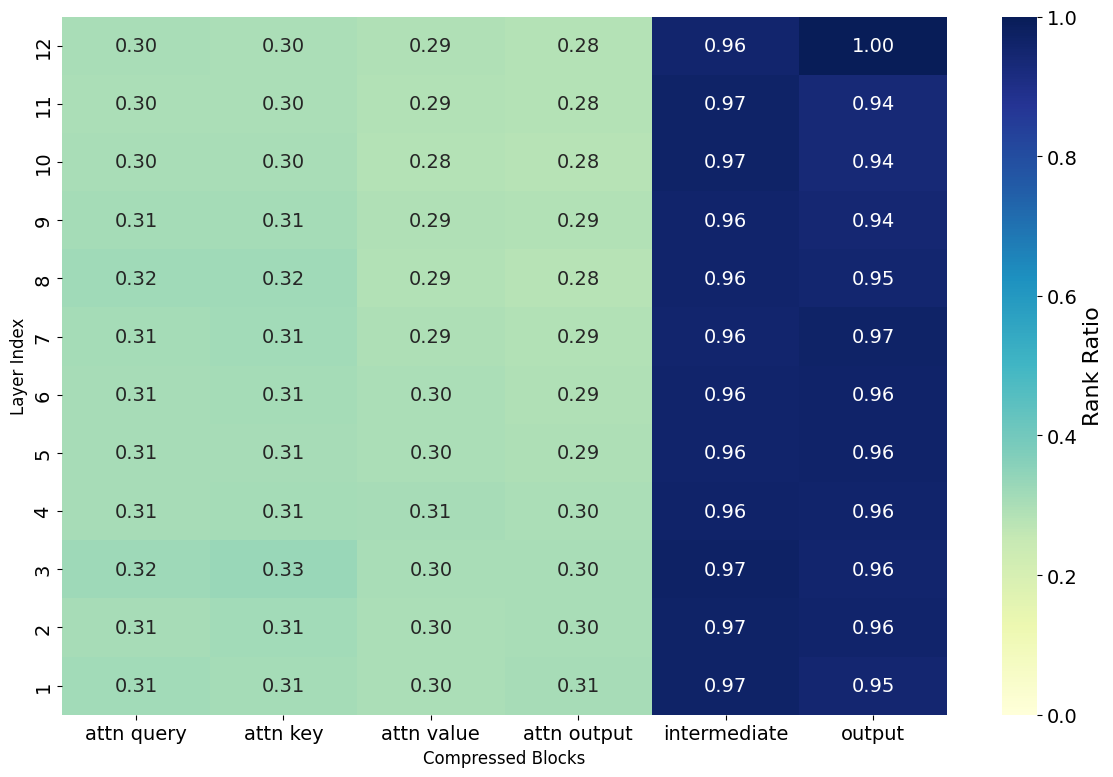

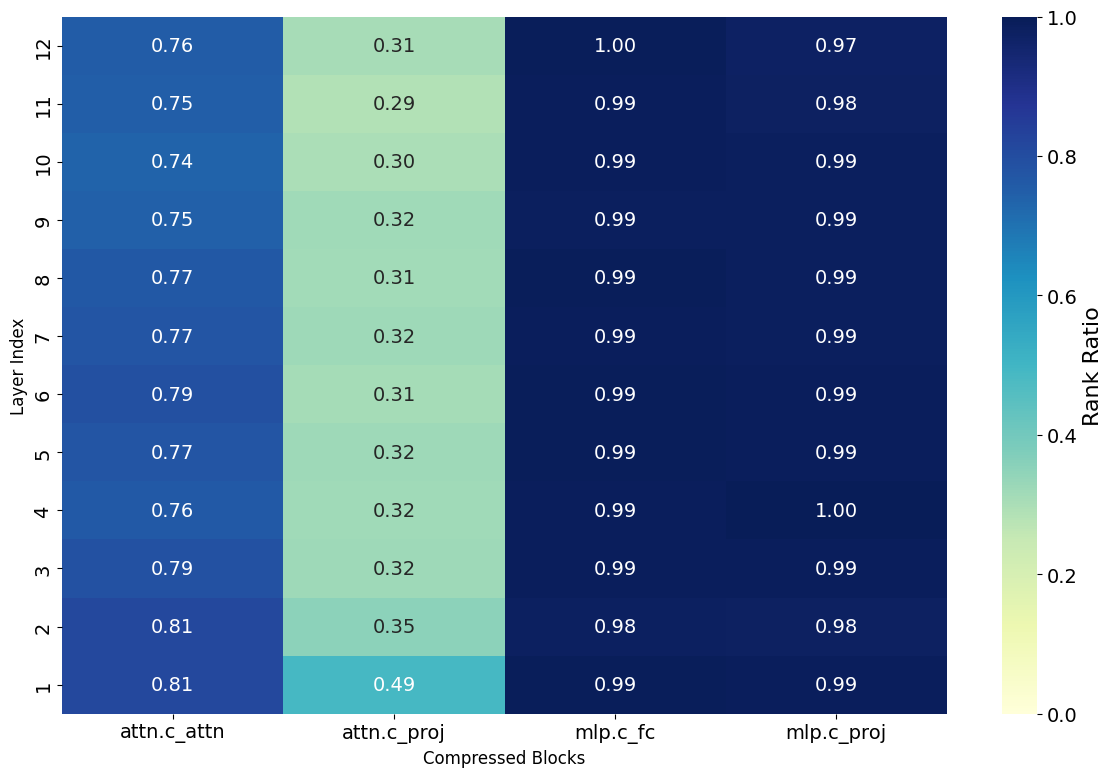

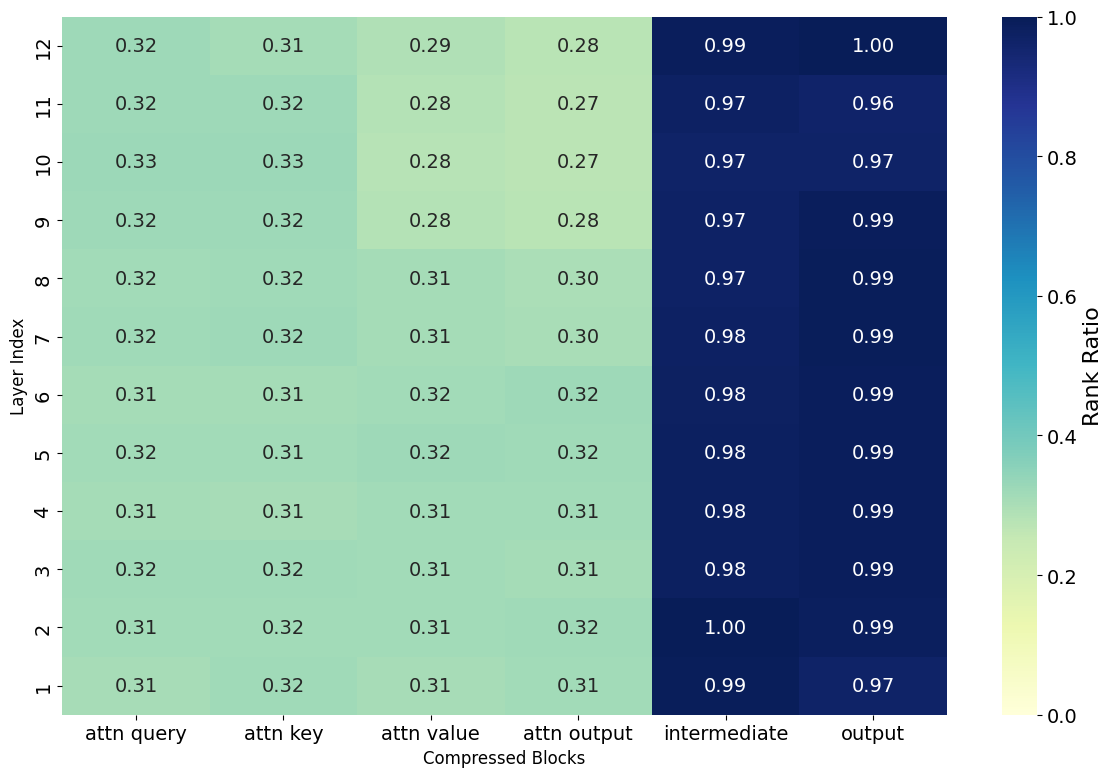

In [ ]:
#Classification Model
name_ = ['bert', 'gpt2', 'roberta']
task = 'classification'
dataset_name_ = ["cola"]

for name in name_ :
  for dataset_name in dataset_name_ :
    weight_path = f'/content/drive/MyDrive/MA2/Master Thesis/project/models/{name}/{name}_{dataset_name}.pth'
    n_class = classification_dict[dataset_name]

    #-> load pretrained model with specified weight path
    my_Model = Model(name, task, weight_path)


    rank_dict = {}
    for block_name in my_Model.compression_blocks :
      rank_dict[block_name] = np.ones(my_Model.n_layers)

    max_rank = 1

    for layer_name in my_Model.compression_layers :
      block_type, layer_idx = my_Model.parse_layer_name(layer_name)
      W = my_Model.weight_matrix(layer_name).detach().cpu().numpy()
      r = alg.rank_metric(W, metric='effective_rank')
      n = W.shape[0]*W.shape[1]
      rank_dict[block_type][layer_idx] = n/r
      if n/r > max_rank :
        max_rank = n/r

    for block_name in my_Model.compression_blocks :
      rank_dict[block_name] = rank_dict[block_name]/max_rank

    plot_rank_ratio_heatmap(rank_dict, '')



 name : bert, dataset_name : rte, tau : 0.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/584k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/69.0k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/621k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2490 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/277 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3000 [00:00<?, ? examples/s]

Map:   0%|          | 0/277 [00:00<?, ? examples/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Map:   0%|          | 0/277 [00:00<?, ? examples/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

eval accuracy: 0.6389891696750902


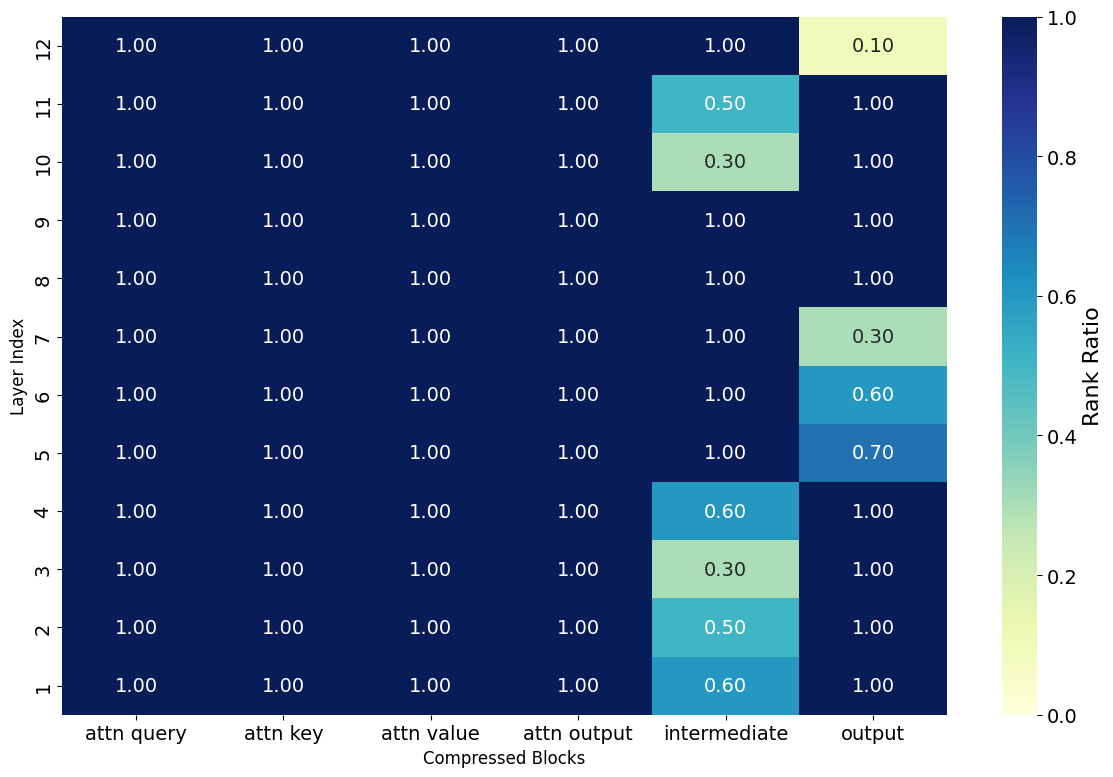

eval accuracy: 0.5342960288808665


Map:   0%|          | 0/277 [00:00<?, ? examples/s]

[{'model': 'bert', 'dataset': 'rte', 'tau': 0.5, 'alpha': 0.1, 'method': 'afm', 'resulting parameters': 0.9055780756853312, 'relative accuracy': 0.8361581920903955, 'benchmark': {'accuracy': 0.6606498194945848}}]


In [ ]:
name_ = ['bert']
dataset_name_ = ['rte']
tau_ = [0.5]

task = 'classification'
split = "validation"
alpha = 0.1
method = 'afm'
error_type = 'distillation'
lr_metric = 'effective_rank'
proxy_type = 'dataset'
complexity_metric = 'max_param'

results = []

for name in name_ :
  for dataset_name in dataset_name_ :
    for tau in tau_ :
      print(f'\n\n name : {name}, dataset_name : {dataset_name}, tau : {tau}')
      current_result = {}

      weight_path = f'/content/drive/MyDrive/MA2/Master Thesis/project/models/{name}/{name}_{dataset_name}.pth'
      n_class = classification_dict[dataset_name]

      my_Model = Model(name, task, weight_path)
      my_Model.tokenize_dataset(dataset_name, split, train_fraction=1, test_fraction=1)

      base_acc = ft.evaluate(my_Model, dataset_name, split=split)

      best_Model, best_rank_ratio_dict, res_param = knapsack_greedy_compression(my_Model,
                                                                    min_rank_ratios=np.linspace(0.1, 0.6, 6), max_rank_ratio=0.7, rank_ratio_step=0.1, output_threshold=tau,
                                                                    proxy_type = proxy_type, dataset_name = dataset_name, batch=16, seq_len=10, hidden_size=768, mu=0, sigma=1,
                                                                    complexity_metric = complexity_metric, lr_metric = lr_metric, error_type=error_type, method=method, base_accuracy = base_acc, alpha=alpha
                                                                    )

      plot_rank_ratio_heatmap(best_rank_ratio_dict, '')



 name : bert, dataset_name : cola, tau : 0.5


train-00000-of-00001.parquet:   0%|          | 0.00/251k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/37.6k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/37.7k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8551 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1043 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1063 [00:00<?, ? examples/s]

Map:   0%|          | 0/1043 [00:00<?, ? examples/s]

Map:   0%|          | 0/1043 [00:00<?, ? examples/s]

eval accuracy: 0.8245445829338447


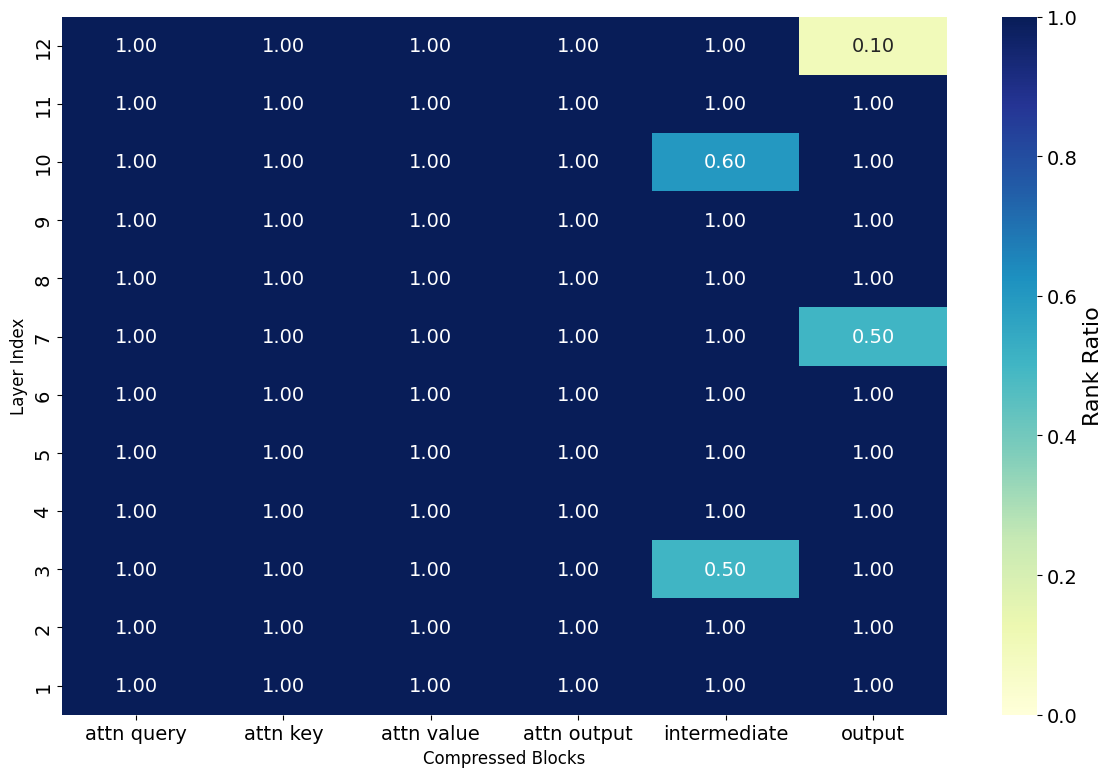

In [ ]:
name_ = ['bert']
dataset_name_ = ['cola']
tau_ = [0.5]

task = 'classification'
split = "validation"
alpha = None
method = 'svd'
error_type = 'hidden_output'
lr_metric = 'effective_rank'
proxy_type = 'random'
complexity_metric = 'max_param'

results = []

for name in name_ :
  for dataset_name in dataset_name_ :
    for tau in tau_ :
      print(f'\n\n name : {name}, dataset_name : {dataset_name}, tau : {tau}')
      current_result = {}

      weight_path = f'/content/drive/MyDrive/MA2/Master Thesis/project/models/{name}/{name}_{dataset_name}.pth'
      n_class = classification_dict[dataset_name]

      my_Model = Model(name, task, weight_path)
      my_Model.tokenize_dataset(dataset_name, split, train_fraction=1, test_fraction=1)

      base_acc = ft.evaluate(my_Model, dataset_name, split=split)

      best_Model, best_rank_ratio_dict, res_param = knapsack_greedy_compression(my_Model,
                                                                    min_rank_ratios=np.linspace(0.1, 0.6, 6), max_rank_ratio=0.7, rank_ratio_step=0.1, output_threshold=tau,
                                                                    proxy_type = proxy_type, dataset_name = dataset_name, batch=16, seq_len=10, hidden_size=768, mu=0, sigma=1,
                                                                    complexity_metric = complexity_metric, lr_metric = lr_metric, error_type=error_type, method=method, base_accuracy = base_acc, alpha=alpha
                                                                    )

      plot_rank_ratio_heatmap(best_rank_ratio_dict, '')



 name : gpt2, dataset_name : qnli, tau : 1.25


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/872k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/877k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/104743 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5463 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5463 [00:00<?, ? examples/s]

Map:   0%|          | 0/5463 [00:00<?, ? examples/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Map:   0%|          | 0/5463 [00:00<?, ? examples/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

eval accuracy: 0.8848617975471352


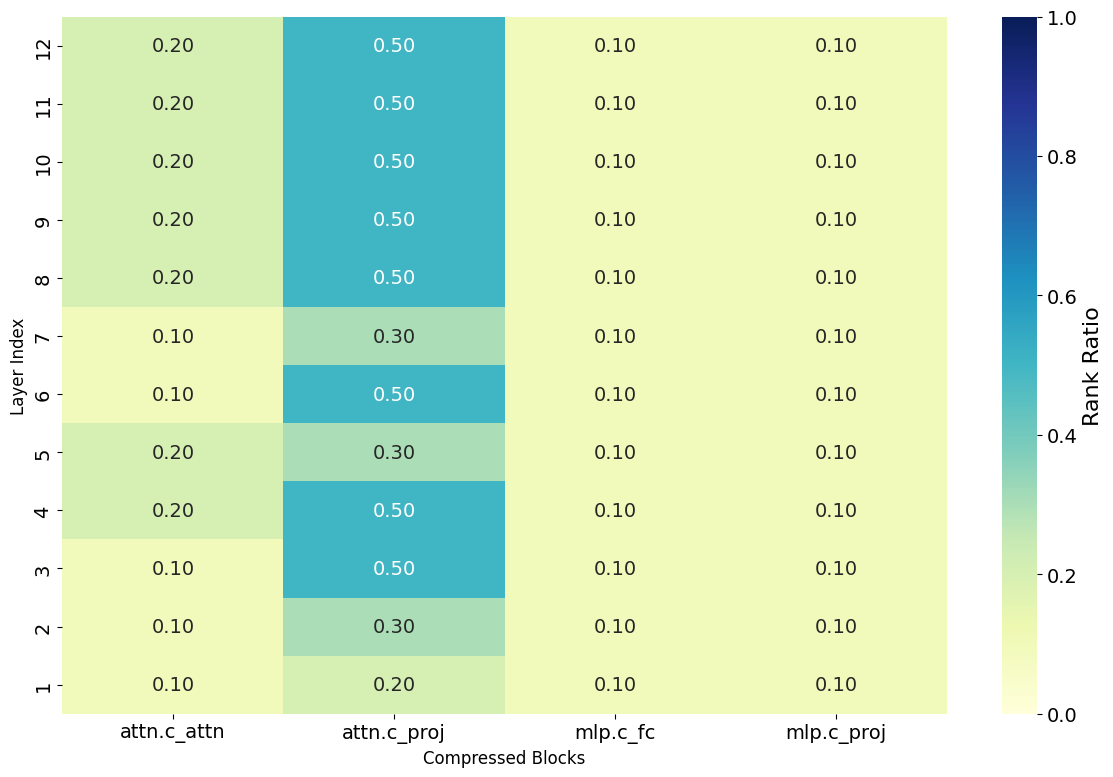

In [ ]:
name_ = ['gpt2']
dataset_name_ = ['qnli']
tau_ = [1.25]

task = 'classification'
split = "validation"
alpha = 0.1
method = 'afm'
error_type = 'distillation'
lr_metric = 'effective_rank'
proxy_type = 'dataset'
complexity_metric = 'max_param'

results = []

for name in name_ :
  for dataset_name in dataset_name_ :
    for tau in tau_ :
      print(f'\n\n name : {name}, dataset_name : {dataset_name}, tau : {tau}')
      current_result = {}

      weight_path = f'/content/drive/MyDrive/MA2/Master Thesis/project/models/{name}/{name}_{dataset_name}.pth'
      n_class = classification_dict[dataset_name]

      my_Model = Model(name, task, weight_path)
      my_Model.tokenize_dataset(dataset_name, split, train_fraction=1, test_fraction=1)

      base_acc = ft.evaluate(my_Model, dataset_name, split=split)

      best_Model, best_rank_ratio_dict, res_param = knapsack_greedy_compression(my_Model,
                                                                    min_rank_ratios=np.linspace(0.1, 0.6, 6), max_rank_ratio=0.7, rank_ratio_step=0.1, output_threshold=tau,
                                                                    proxy_type = proxy_type, dataset_name = dataset_name, batch=16, seq_len=10, hidden_size=768, mu=0, sigma=1,
                                                                    complexity_metric = complexity_metric, lr_metric = lr_metric, error_type=error_type, method=method, base_accuracy = base_acc, alpha=alpha
                                                                    )

      plot_rank_ratio_heatmap(best_rank_ratio_dict, '')



 name : gpt2, dataset_name : qnli, tau : 0.5


eval accuracy: 0.8848617975471352


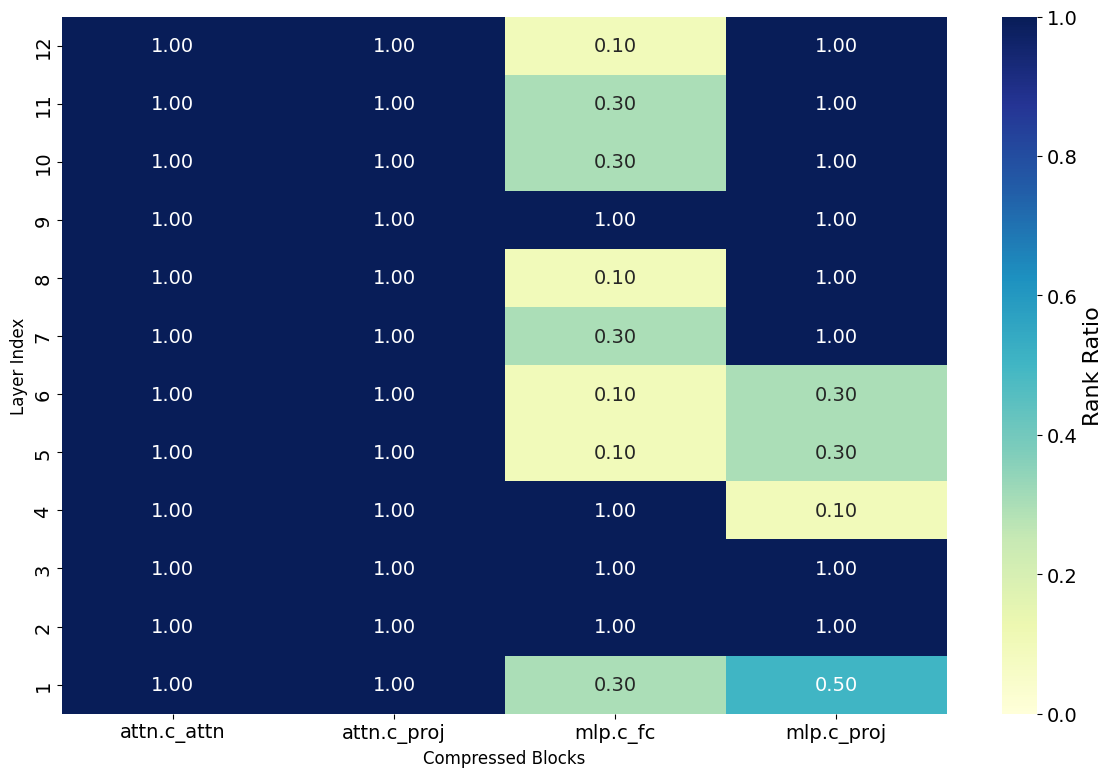

In [ ]:
name_ = ['gpt2']
dataset_name_ = ['qnli']
tau_ = [0.5]

task = 'classification'
split = "validation"
alpha = None
method = 'svd'
error_type = 'hidden_output'
lr_metric = 'effective_rank'
proxy_type = 'random'
complexity_metric = 'max_param'

results = []

for name in name_ :
  for dataset_name in dataset_name_ :
    for tau in tau_ :
      print(f'\n\n name : {name}, dataset_name : {dataset_name}, tau : {tau}')
      current_result = {}

      weight_path = f'/content/drive/MyDrive/MA2/Master Thesis/project/models/{name}/{name}_{dataset_name}.pth'
      n_class = classification_dict[dataset_name]

      my_Model = Model(name, task, weight_path)
      my_Model.tokenize_dataset(dataset_name, split, train_fraction=1, test_fraction=1)

      base_acc = ft.evaluate(my_Model, dataset_name, split=split)

      best_Model, best_rank_ratio_dict, res_param = knapsack_greedy_compression(my_Model,
                                                                    min_rank_ratios=np.linspace(0.1, 0.6, 6), max_rank_ratio=0.7, rank_ratio_step=0.1, output_threshold=tau,
                                                                    proxy_type = proxy_type, dataset_name = dataset_name, batch=16, seq_len=10, hidden_size=768, mu=0, sigma=1,
                                                                    complexity_metric = complexity_metric, lr_metric = lr_metric, error_type=error_type, method=method, base_accuracy = base_acc, alpha=alpha
                                                                    )

      plot_rank_ratio_heatmap(best_rank_ratio_dict, '')